In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from bs4 import BeautifulSoup
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.common.keys import Keys
from webdriver_manager.chrome import ChromeDriverManager    
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from selenium.webdriver.common.alert import Alert
from tqdm import tqdm_notebook
from urllib.request import urlopen
import time
import requests
import os
from glob import glob
import shutil
import matplotlib.font_manager as fm
font_name = fm.FontProperties(fname="C:\\Windows\\Fonts\\malgun.ttf").get_name()
plt.rc("font", family=font_name)
import scipy.stats as stats

import matplotlib as mlp
mlp.rcParams["axes.unicode_minus"] = False

전기간 관람객 수 개별 영화 관람객 수

개봉 10일차까지 보이는 공통적인 패턴.

총관람객수 추이와 개별 영화 추이의 관계 3.천만 영화 - 비천만영화

개봉요일에 따른 차이

천만영화 상영 중일 떄의 전체 관람객 수 - 아닐 떄의 전체 관람객 수

연휴와의 관계

연휴를 많이 포함하는 영화의 관람객 수
날씨와 총관람객 수의 관계

연휴, 주중/주말, 요일, 기온/강수량, 티켓 가격

In [3]:
# 전처리 

In [4]:
# 일자별 관람 통계
daily_tot_movie_aud=pd.read_csv("../movie_DB/macro_envirment/audience1_preprocess1.csv", 
                                usecols=lambda column: column != "Unnamed: 0" )
daily_aud=daily_tot_movie_aud[["연도","전체상영편수","전체관객수","요일"]]
daily_aud.loc[:, "연도"] = pd.to_datetime(daily_aud.loc[:, "연도"], format="%Y-%m-%d %H:%M:%S")
daily_aud.columns=["일자","전체상영편수","전체관객수","요일"]
daily_aud.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7036 entries, 0 to 7035
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   일자      7036 non-null   datetime64[ns]
 1   전체상영편수  7036 non-null   int64         
 2   전체관객수   7036 non-null   int64         
 3   요일      7036 non-null   object        
dtypes: datetime64[ns](1), int64(2), object(1)
memory usage: 220.0+ KB


C:\Users\acorn\AppData\Local\Temp\ipykernel_5768\2519110611.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  daily_aud.loc[:, "연도"] = pd.to_datetime(daily_aud.loc[:, "연도"], format="%Y-%m-%d %H:%M:%S")


In [5]:
# 개별 영화 통계를 Dict로
csvs=glob("../movie_DB/individual_trend/*.csv")
movies = {}
m_movies={}

for file_path in csvs:
    # Get the file name without the extension
    file_name = os.path.splitext(os.path.basename(file_path))[0]
    
    movies[file_name] = pd.read_csv(file_path,usecols=lambda column: column != "Unnamed: 0")
movie_titles = list(movies.keys())
for name in movie_titles:
    movies[f"{name}"]=movies[f"{name}"][["날짜",
                                         "스크린수","스크린점유율",
                                         "관객수","관객수증감(전일대비)","누적관객수"]]
    movies[name] = movies[name].rename(columns={"날짜": "일자"})
    movies[f"{name}"]["일자"] = pd.to_datetime(movies[f"{name}"]["일자"], format="%Y-%m-%d")
    m_movies[f"{name}"]=pd.merge(movies[f"{name}"],daily_aud)

In [6]:
movie_titles = list(movies.keys())
print(movie_titles)

['1987', '7번방의 선물', '검사외전', '겨울왕국 2', '겨울왕국', '공조', '과속스캔들', '관상', '광해, 왕이 된 남자', '괴물', '국가대표', '국제시장', '극한직업', '기생충', '도둑들', '디워', '명량', '미션임파서블-고스트프로토콜', '밀정', '백두산', '범죄도시2', '베를린', '베테랑', '변호인', '보헤미안 랩소디', '부산행', '설국열차', '수상한 그녀', '스파이더맨- 노 웨이 홈', '스파이더맨- 파 프롬 홈', '스파이더맨- 홈 커밍', '신과함께-인과 연', '신과함께-죄와 벌', '실미도', '써니', '아바타- 물의 길', '아바타', '아이언맨 3', '알라딘', '암살', '어벤져스- 에이지 오브 울트론', '어벤져스- 엔드게임', '어벤져스- 인피니티 워', '엑시트', '왕의 남자', '인터스텔라', '최종병기 활', '캡틴 아메리카- 시빌 워', '탑건- 매버릭', '태극기 휘날리며', '택시운전사', '트랜스포머 3', '트랜스포머- 패자의 역습', '트랜스포머', '한산- 용의 출현', '해운대', '해적- 바다로 간 산적', '히말라야']


In [7]:
m_movies["겨울왕국"].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 69 entries, 0 to 68
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   일자           69 non-null     datetime64[ns]
 1   스크린수         69 non-null     int64         
 2   스크린점유율       69 non-null     float64       
 3   관객수          69 non-null     int64         
 4   관객수증감(전일대비)  69 non-null     int64         
 5   누적관객수        69 non-null     int64         
 6   전체상영편수       69 non-null     int64         
 7   전체관객수        69 non-null     int64         
 8   요일           69 non-null     object        
dtypes: datetime64[ns](1), float64(1), int64(6), object(1)
memory usage: 5.4+ KB


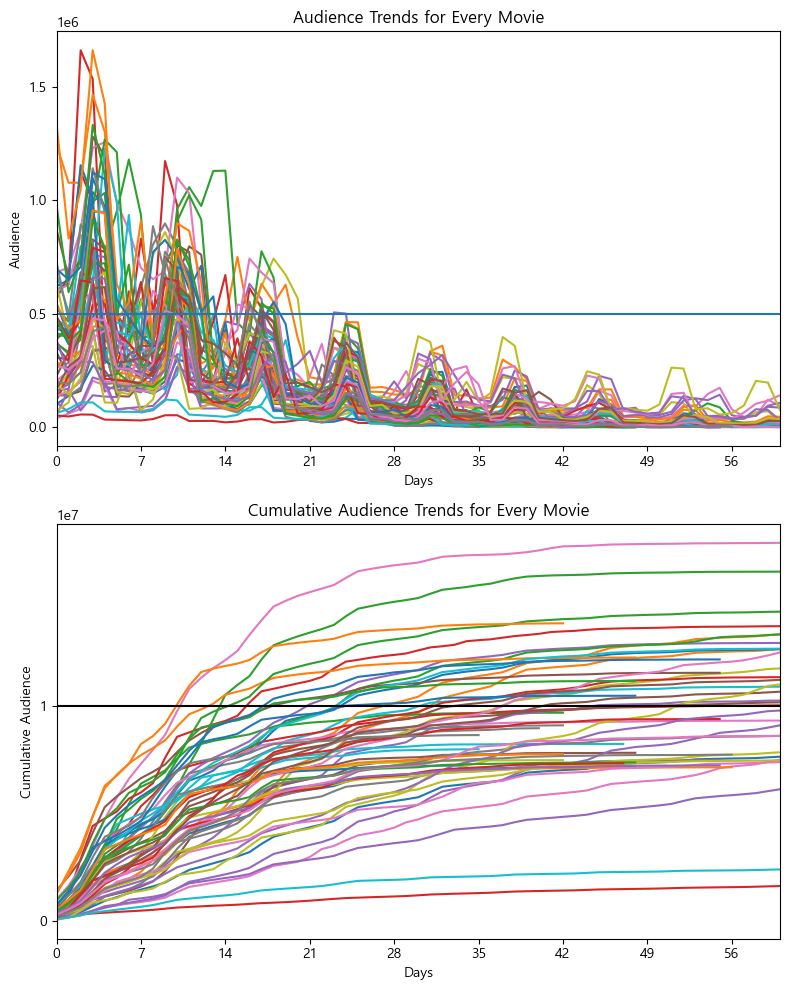

In [8]:
#모든 영화 그래프 그리기
fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, figsize=(8, 10))

for title in movie_titles:
    ax1.plot(m_movies[title]["관객수"], label=title)

ax1.set_xlabel('Days')
ax1.set_ylabel('Audience')
ax1.set_title('Audience Trends for Every Movie')
ax1.set_xlim((0, 60))
ax1.axhline(y=500000)

x_max = 60
ax1.set_xlim((0, x_max))
ticks = np.arange(0, x_max, 7)
ax1.set_xticks(ticks)
y_max = max([m_movies[title]["관객수"].max() for title in movie_titles if m_movies[title]["누적관객수"].iloc[-1] > 10000000])
ticks_y1 = np.arange(0, y_max, 500000)
ax1.set_yticks(ticks_y1)

for title in movie_titles:
    ax2.plot(m_movies[title]["누적관객수"], label=title)

ax2.set_xlabel('Days')
ax2.set_ylabel('Cumulative Audience')
ax2.set_title('Cumulative Audience Trends for Every Movie')
ax2.set_xlim((0, 90))
ax2.axhline(y=10000000, color="black")

ax2.set_xlim((0, x_max))
ticks = np.arange(0, x_max, 7)
ax2.set_xticks(ticks)
y_max = max([m_movies[title]["누적관객수"].max() for title in movie_titles if m_movies[title]["누적관객수"].iloc[-1] > 10000000])
ticks_y2 = np.arange(0, y_max, 10000000)
ax2.set_yticks(ticks_y2)

plt.tight_layout()

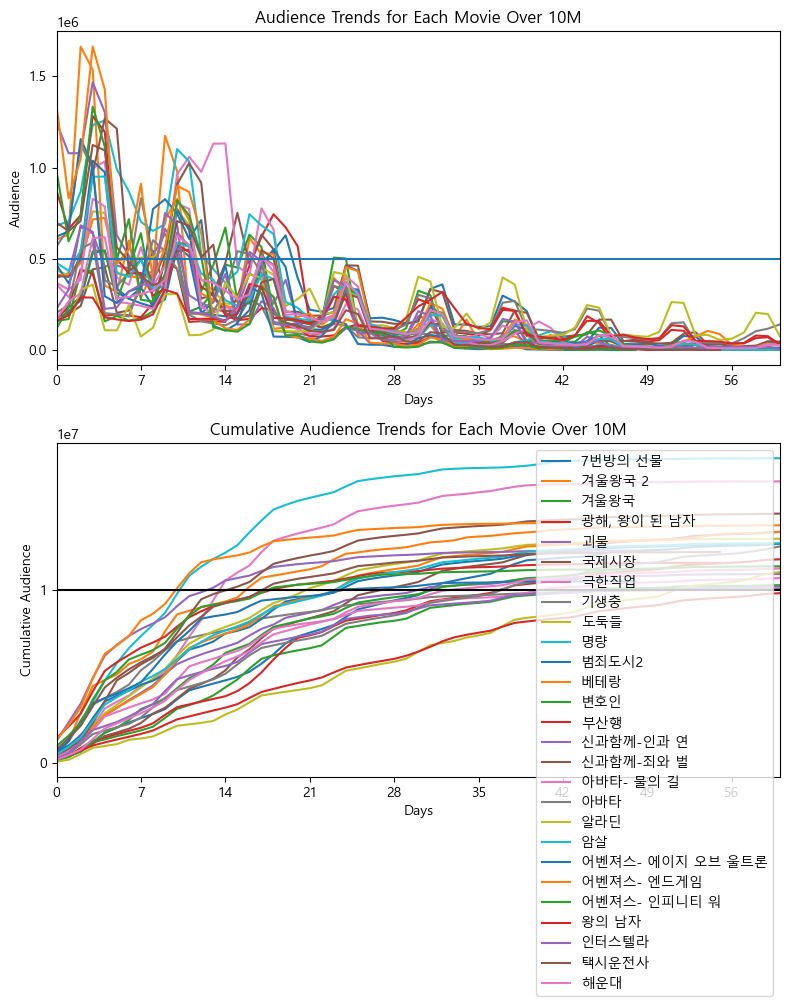

In [14]:
# 천만 영화 그래프 그리기 
fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, figsize=(8, 10))

for title in movie_titles:
    if m_movies[title]["누적관객수"].iloc[-1] > 10000000:
        ax1.plot(m_movies[title]["관객수"], label=title)

ax1.set_xlabel('Days')
ax1.set_ylabel('Audience')
ax1.set_title('Audience Trends for Each Movie Over 10M')
ax1.set_xlim((0, 60))
ax1.axhline(y=500000)

x_max = 60
ax1.set_xlim((0, x_max))
ticks = np.arange(0, x_max, 7)
ax1.set_xticks(ticks)
y_max = max([m_movies[title]["관객수"].max() for title in movie_titles if m_movies[title]["누적관객수"].iloc[-1] > 10000000])
ticks_y1 = np.arange(0, y_max, 500000)
ax1.set_yticks(ticks_y1)

for title in movie_titles:
    if m_movies[title]["누적관객수"].iloc[-1] > 10000000:
        ax2.plot(m_movies[title]["누적관객수"], label=title)

ax2.set_xlabel('Days')
ax2.set_ylabel('Cumulative Audience')
ax2.set_title('Cumulative Audience Trends for Each Movie Over 10M')
ax2.set_xlim((0, 90))
ax2.axhline(y=10000000, color="black")

ax2.set_xlim((0, x_max))
ticks = np.arange(0, x_max, 7)
ax2.set_xticks(ticks)
y_max = max([m_movies[title]["누적관객수"].max() for title in movie_titles if m_movies[title]["누적관객수"].iloc[-1] > 10000000])
ticks_y2 = np.arange(0, y_max, 10000000)
ax2.set_yticks(ticks_y2)
ax2.legend()

plt.tight_layout()

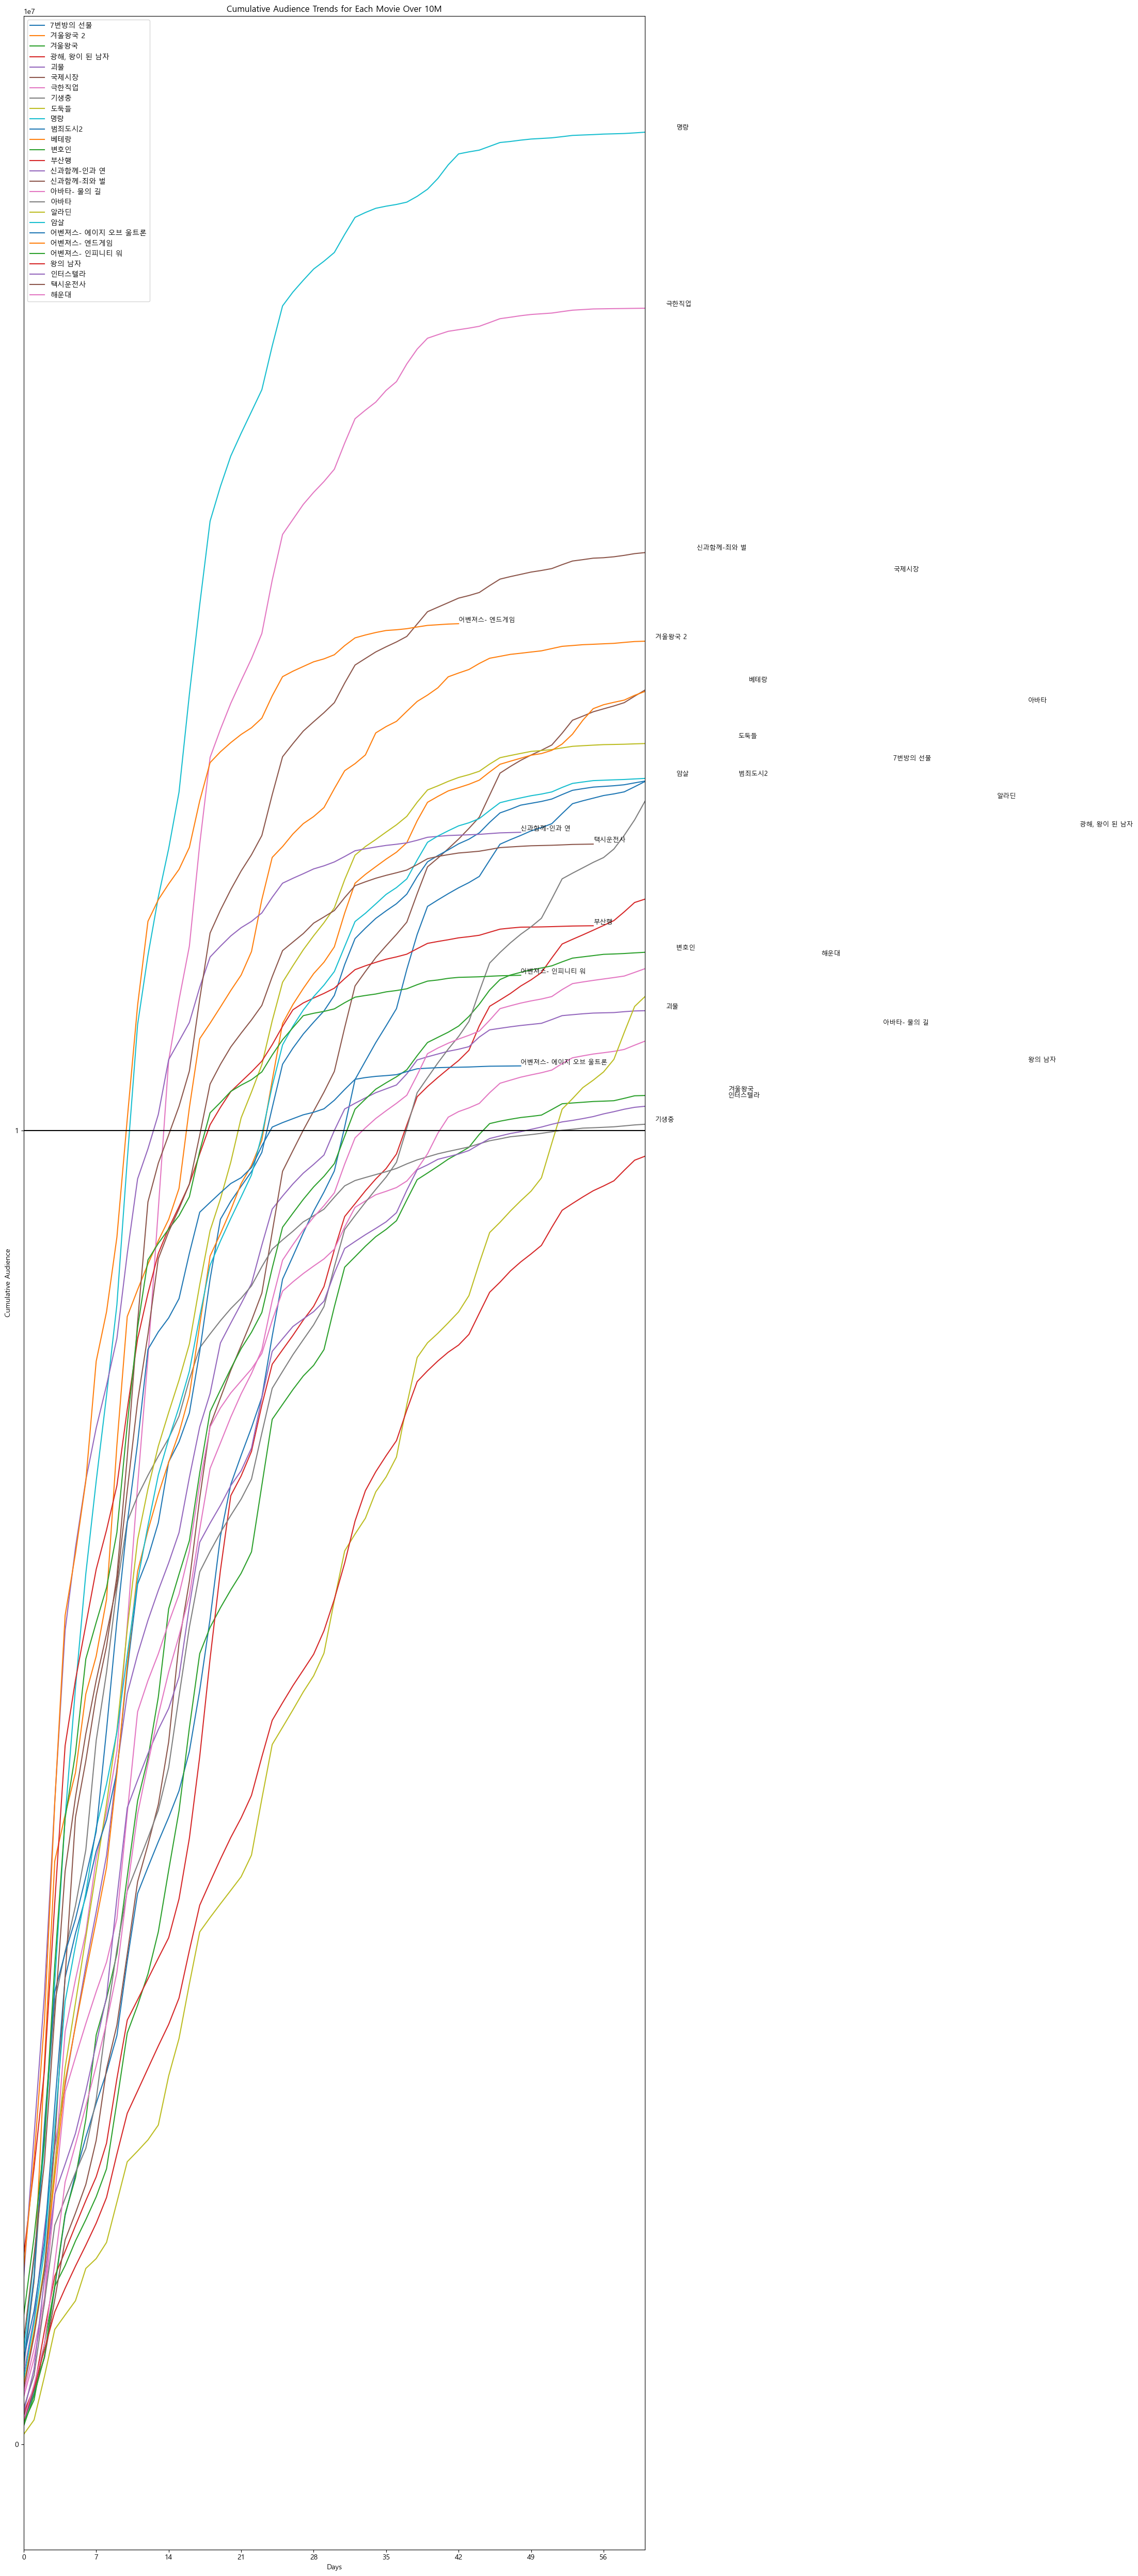

In [28]:
fig, ax2 = plt.subplots(nrows=1, ncols=1, figsize=(30, 50))
for title in movie_titles:
    if m_movies[title]["누적관객수"].iloc[-1] > 10000000:
        ax2.plot(m_movies[title]["누적관객수"], label=title)
        last_day = m_movies[title]["누적관객수"].index[-1]
        last_value = m_movies[title]["누적관객수"].iloc[-1]
        ax2.text(last_day, last_value, title, fontsize=9, horizontalalignment='left', verticalalignment='bottom')

ax2.set_xlabel('Days')
ax2.set_ylabel('Cumulative Audience')
ax2.set_title('Cumulative Audience Trends for Each Movie Over 10M')
ax2.set_xlim((0, 90))
ax2.axhline(y=10000000, color="black")

ax2.set_xlim((0, x_max))
ticks = np.arange(0, x_max, 7)
ax2.set_xticks(ticks)
y_max = max([m_movies[title]["누적관객수"].max() for title in movie_titles if m_movies[title]["누적관객수"].iloc[-1] > 10000000])
ticks_y2 = np.arange(0, y_max, 10000000)
ax2.set_yticks(ticks_y2)
ax2.legend()

plt.tight_layout()


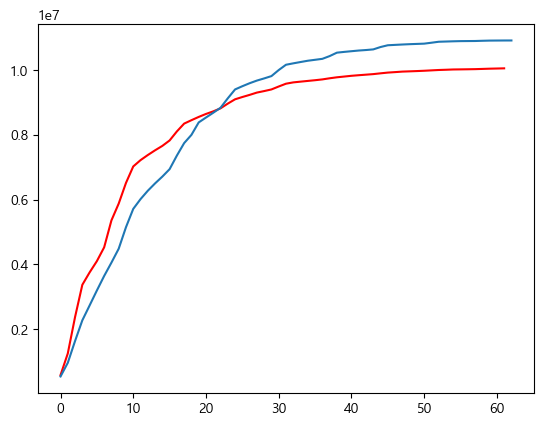

In [26]:
plt.plot(m_movies["기생충"]["누적관객수"], color="red")
plt.plot(m_movies["괴물"]["누적관객수"])

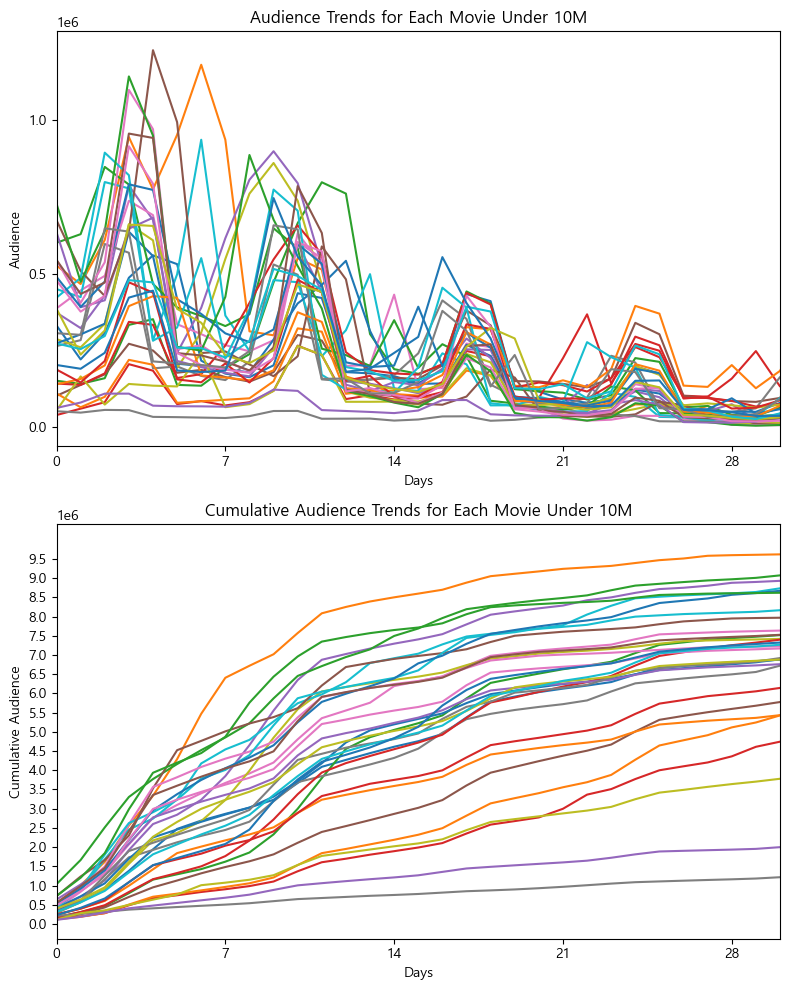

In [10]:
fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, figsize=(8, 10))

for title in movie_titles:
    if m_movies[title]["누적관객수"].iloc[-1] < 10000000:
        ax1.plot(m_movies[title]["관객수"], label=title)

ax1.set_xlabel('Days')
ax1.set_ylabel('Audience')
ax1.set_title('Audience Trends for Each Movie Under 10M')
ax1.set_xlim((0, 60))

x_max = 30
ax1.set_xlim((0, x_max))
ticks = np.arange(0, x_max, 7)
ax1.set_xticks(ticks)
y_max = max([m_movies[title]["관객수"].max() for title in movie_titles if m_movies[title]["누적관객수"].iloc[-1] < 10000000])
ticks_y = np.arange(0, y_max, 500000)
ax1.set_yticks(ticks_y)

for title in movie_titles:
    if m_movies[title]["누적관객수"].iloc[-1] < 10000000:
        ax2.plot(m_movies[title]["누적관객수"], label=title)

ax2.set_xlabel('Days')
ax2.set_ylabel('Cumulative Audience')
ax2.set_title('Cumulative Audience Trends for Each Movie Under 10M')
ax2.set_xlim((0, 60))

ax2.set_xlim((0, x_max))
ticks = np.arange(0, x_max, 7)
ax2.set_xticks(ticks)
y_max = max([m_movies[title]["누적관객수"].max() for title in movie_titles if m_movies[title]["누적관객수"].iloc[-1] < 10000000])
ticks_y = np.arange(0, y_max, 500000)
ax2.set_yticks(ticks_y)

plt.tight_layout()

In [11]:
#각 영화의 관객수와 전체관객수의 상관계수
cor_sum = 0
num_movies = len(movie_titles)

for title in movie_titles:
    correlation = m_movies[title]['관객수'].corr(m_movies[title]['전체관객수']).round(2)
    print(f"Correlation between 관객수 and 전체관객수 for {title}: {correlation}")
    cor_sum += correlation

average_correlation = cor_sum / num_movies
print(f"Average correlation for {num_movies} movies: {average_correlation:.2f}")


Correlation between 관객수 and 전체관객수 for 1987: 0.88
Correlation between 관객수 and 전체관객수 for 7번방의 선물: 0.88
Correlation between 관객수 and 전체관객수 for 검사외전: 0.73
Correlation between 관객수 and 전체관객수 for 겨울왕국 2: 0.61
Correlation between 관객수 and 전체관객수 for 겨울왕국: 0.91
Correlation between 관객수 and 전체관객수 for 공조: 0.83
Correlation between 관객수 and 전체관객수 for 과속스캔들: 0.72
Correlation between 관객수 and 전체관객수 for 관상: 0.86
Correlation between 관객수 and 전체관객수 for 광해, 왕이 된 남자: 0.5
Correlation between 관객수 and 전체관객수 for 괴물: 0.85
Correlation between 관객수 and 전체관객수 for 국가대표: 0.86
Correlation between 관객수 and 전체관객수 for 국제시장: 0.81
Correlation between 관객수 and 전체관객수 for 극한직업: 0.84
Correlation between 관객수 and 전체관객수 for 기생충: 0.49
Correlation between 관객수 and 전체관객수 for 도둑들: 0.63
Correlation between 관객수 and 전체관객수 for 디워: 0.92
Correlation between 관객수 and 전체관객수 for 명량: 0.79
Correlation between 관객수 and 전체관객수 for 미션임파서블-고스트프로토콜: 0.57
Correlation between 관객수 and 전체관객수 for 밀정: 0.69
Correlation between 관객수 and 전체관객수 for 백두산: 0.73
Correlation b

In [12]:
#이상치 
outlier=["트랜스포머","트랜스포머- 패자의 역습","인터스텔라", "스파이더맨- 홈 커밍"]

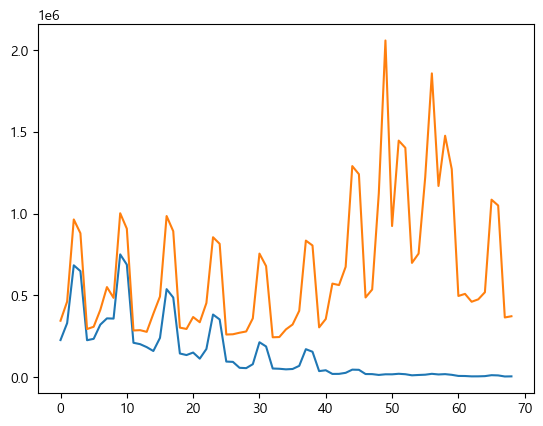

In [13]:
plt.plot(m_movies["인터스텔라"]["관객수"])
plt.plot(m_movies["인터스텔라"]["전체관객수"])

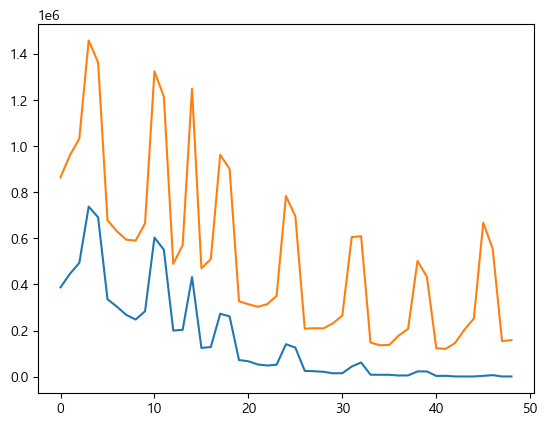

In [14]:
plt.plot(m_movies["디워"]["관객수"])
plt.plot(m_movies["디워"]["전체관객수"])

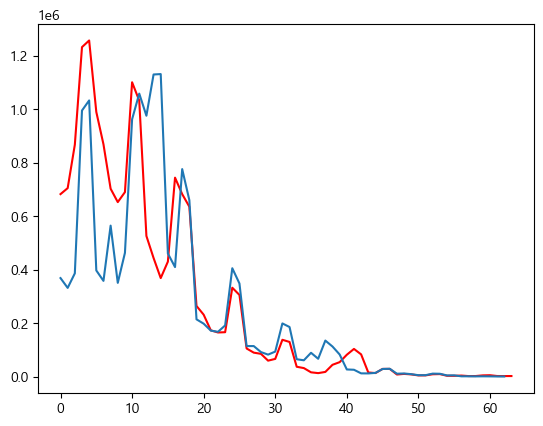

In [15]:
plt.plot(m_movies["명량"]["관객수"], color="red")
plt.plot(m_movies["극한직업"]["관객수"])

개봉일에 따른 각 영화별 트랜드 

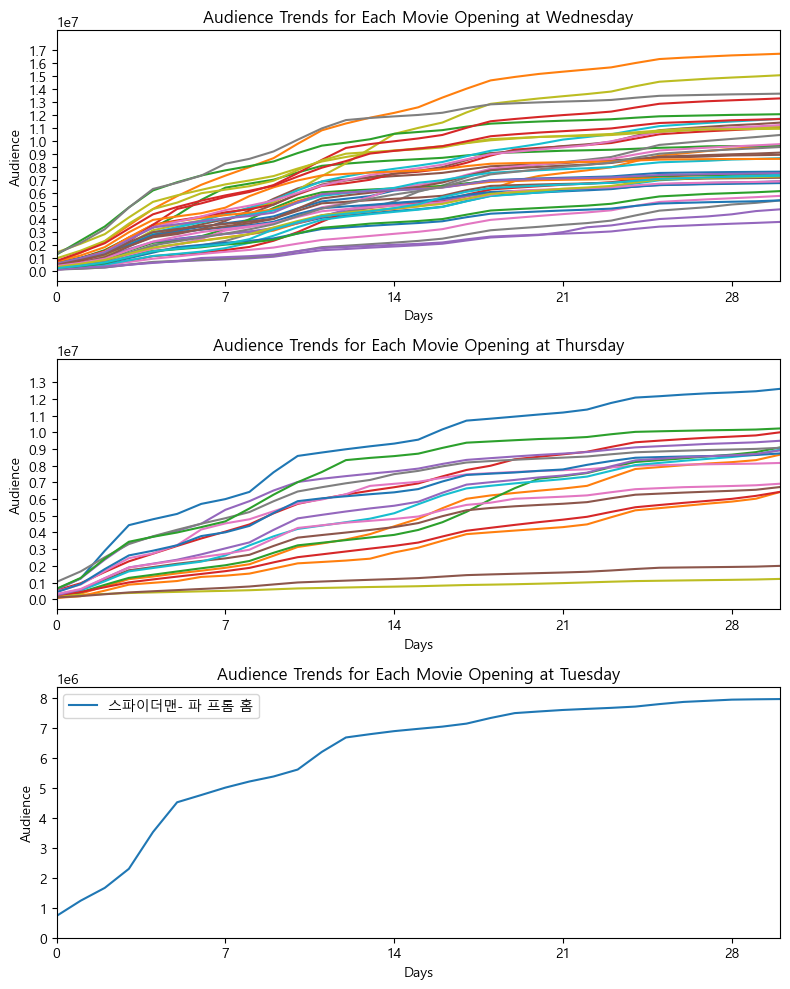

In [16]:
fig, (ax1, ax2, ax3) = plt.subplots(nrows=3, ncols=1, figsize=(8, 10))

for title in movie_titles:
    if m_movies[title]["요일"].loc[0]=="Wednesday":
        ax1.plot(m_movies[title]["누적관객수"], label=title)

ax1.set_xlabel('Days')
ax1.set_ylabel('Audience')
ax1.set_title('Audience Trends for Each Movie Opening at Wednesday')
ax1.set_xlim((0, 60))

x_max = 30
ax1.set_xlim((0, x_max))
ticks = np.arange(0, x_max, 7)
ax1.set_xticks(ticks)
y_max = max([m_movies[title]["누적관객수"].max() for title in movie_titles if m_movies[title]["요일"].loc[0]=="Wednesday"])
ticks_y = np.arange(0, y_max, 1000000)
ax1.set_yticks(ticks_y)

for title in movie_titles:
    if m_movies[title]["요일"].loc[0]=="Thursday":
        ax2.plot(m_movies[title]["누적관객수"], label=title)

ax2.set_xlabel('Days')
ax2.set_ylabel('Audience')
ax2.set_title('Audience Trends for Each Movie Opening at Thursday')
ax2.set_xlim((0, 60))

x_max = 30
ax2.set_xlim((0, x_max))
ticks = np.arange(0, x_max, 7)
ax2.set_xticks(ticks)
y_max = max([m_movies[title]["누적관객수"].max() for title in movie_titles if m_movies[title]["요일"].loc[0]=="Thursday"])
ticks_y = np.arange(0, y_max, 1000000)
ax2.set_yticks(ticks_y)

for title in movie_titles:
    if m_movies[title]["요일"].loc[0]=="Tuesday":
        ax3.plot(m_movies[title]["누적관객수"], label=title)

ax3.set_xlabel('Days')
ax3.set_ylabel('Audience')
ax3.set_title('Audience Trends for Each Movie Opening at Tuesday')
ax3.set_xlim((0, 60))

x_max = 30
ax3.set_xlim((0, x_max))
ticks = np.arange(0, x_max, 7)
ax3.set_xticks(ticks)
y_max = max([m_movies[title]["누적관객수"].max() for title in movie_titles if m_movies[title]["요일"].loc[0]=="Tuesday"])
ticks_y = np.arange(0, y_max, 1000000)
ax3.set_yticks(ticks_y)
ax3.legend()

plt.tight_layout()

In [17]:
daily_aud.head()

,일자,전체상영편수,전체관객수,요일
0,2004-01-01,7,113837,Thursday
1,2004-01-02,7,104357,Friday
2,2004-01-03,7,125234,Saturday
3,2004-01-04,7,120203,Sunday
4,2004-01-05,7,64180,Monday


In [18]:
daily_ticket=pd.read_csv("../movie_DB/macro_envirment/daily_audience.csv",usecols=lambda column: column != "Unnamed: 0" )
daily_ticket.loc[:, "일자"] = pd.to_datetime(daily_ticket.loc[:, "일자"], format="%Y-%m-%d")
daily_ticket.head()

,일자,전체개봉편수,전체상영편수,전체매출액,전체관객수,요일,가격,공휴일
0,2004-01-01,1,7,727005000,113837,Thu,7000,1
1,2004-01-02,0,7,642276500,104357,Fri,7000,0
2,2004-01-03,0,7,796519500,125234,Sat,7000,0
3,2004-01-04,0,7,763271000,120203,Sun,7000,0
4,2004-01-05,0,7,409269500,64180,Mon,7000,0


In [19]:
# 전처리 후 R로 옮기기 위한 코드

# weather=pd.read_csv("../movie_DB/macro_envirment/weather.csv",usecols=lambda column: column != "Unnamed: 0")
# weather.rename(columns={"날짜": "일자"}, inplace=True)
# weather.loc[:, "일자"] = pd.to_datetime(weather.loc[:, "일자"], format="%Y-%m-%d")

# daily_ticket=pd.read_csv("../movie_DB/macro_envirment/daily_audience.csv",usecols=lambda column: column != "Unnamed: 0" )
# daily_ticket.loc[:, "일자"] = pd.to_datetime(daily_ticket.loc[:, "일자"], format="%Y-%m-%d")

# daily_info=pd.merge(weather,daily_ticket)
# daily_info.to_csv("daily_info.csv", index=False)

In [36]:
# 가격표와 전체 관람객 수의 관계 
daily_info.head()

# price.loc[price["date"] == "2004-07-01 00:00:00"]    # 182행
# price.loc[price["date"] == "2009-07-02 00:00:00"]    # 183:2009행       # 공휴일 8000원
# price.loc[price["date"] == "2013-02-13 00:00:00"]    # 2010:3331행      # 공휴일 9000원
# price.loc[price["date"] == "2016-03-02 00:00:00"]    # 3332:4444행      # 공휴일 10000원
# price.loc[price["date"] == "2018-04-10 00:00:00"]    # 4445:5213행      # 공휴일: 11000원
# price.loc[price["date"] == "2020-10-25 00:00:00"]    # 5214:6142행      # 공휴일 : 12000원
# price.loc[price["date"] == "2021-04-01 00:00:00"]    # 6300행           # 공휴일 : 13000원

,일자,평균기온,최저기온,최고기온,강수량,전체개봉편수,전체상영편수,전체매출액,전체관객수,요일,가격,공휴일
0,2004-01-01,3.4,-1.0,8.4,0.0,1,7,727005000,113837,Thu,7000,1
1,2004-01-02,3.1,-0.8,7.6,1.3,0,7,642276500,104357,Fri,7000,0
2,2004-01-03,2.5,-2.6,9.0,0.0,0,7,796519500,125234,Sat,7000,0
3,2004-01-04,0.8,-4.4,8.6,0.0,0,7,763271000,120203,Sun,7000,0
4,2004-01-05,0.8,-4.9,9.5,0.0,0,7,409269500,64180,Mon,7000,0
...,...,...,...,...,...,...,...,...,...,...,...,...
2002,2009-06-25,24.4,17.6,31.5,0.0,3,50,3055523000,470938,Thu,7000,0
2006,2009-06-29,24.4,21.6,28.8,31.2,0,51,2234101500,340086,Mon,7000,0
2007,2009-06-30,22.6,19.5,25.8,7.0,0,54,2008450500,308407,Tue,7000,0
2008,2009-07-01,22.7,18.4,27.8,1.4,2,49,1958743000,294409,Wed,7000,0


가격표와 총 관객 수의 관계 

C:\Users\acorn\AppData\Local\Temp\ipykernel_9112\1074085873.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  range_data['일자_ordinal'] = range_data['일자'].apply(lambda x: x.toordinal())


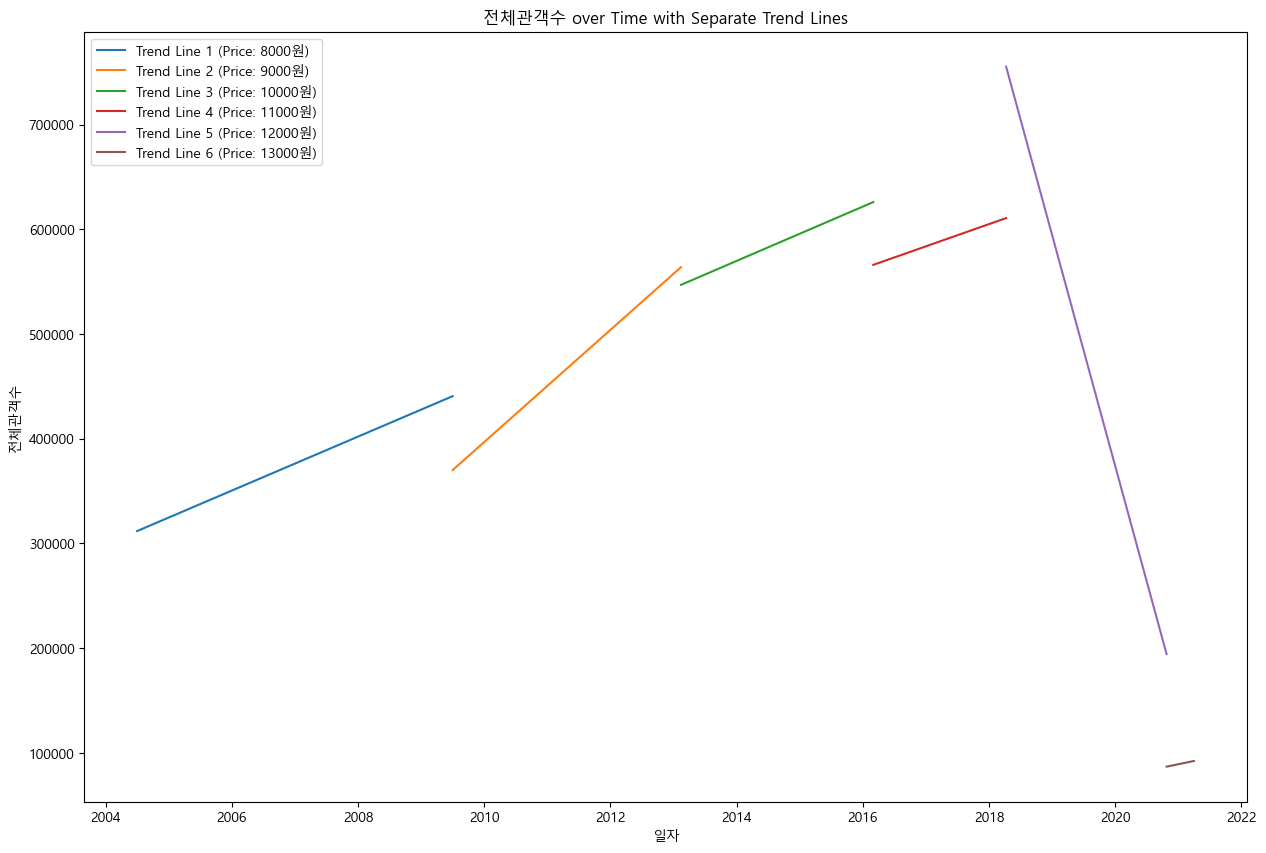

In [60]:
# Define the date ranges
date_ranges = [
    ("2004-07-01", "2009-07-02"),
    ("2009-07-02", "2013-02-13"),
    ("2013-02-13", "2016-03-02"),
    ("2016-03-02", "2018-04-10"),
    ("2018-04-10", "2020-10-25"),
    ("2020-10-25", "2021-04-01"),
    ("2021-04-01", "2022-12-31"),
]

# Define the prices for each date range
prices = [8000, 9000, 10000, 11000, 12000, 13000]

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(15, 10))

for i, (start_date, end_date) in enumerate(date_ranges[:-1]):  # Exclude the last range, as there's no price for it
    # Filter data for the current date range
    range_data = daily_info[(daily_info["일자"] >= start_date) & (daily_info["일자"] <= end_date)]

    if not range_data.empty:
        # Convert dates to ordinal representation for regression
        range_data['일자_ordinal'] = range_data['일자'].apply(lambda x: x.toordinal())

        # Perform linear regression
        coefficients = np.polyfit(range_data['일자_ordinal'], range_data['전체관객수'], deg=1)
        trend_line = np.poly1d(coefficients)

        # Plot the trend line
        ax.plot(range_data['일자'], trend_line(range_data['일자_ordinal']), label=f'Trend Line {i + 1} (Price: {prices[i]}원)', linestyle='-')

# Set axis labels
ax.set_xlabel("일자")
ax.set_ylabel("전체관객수")

# Add a title and legend to the plot
ax.set_title("전체관객수 over Time with Separate Trend Lines")
ax.legend()

plt.show()


In [74]:
borderline=["2004-07-01","2009-07-02","2013-02-13","2016-03-02","2018-04-10","2020-10-25","2021-04-01","2022-12-31"]
for day in borderline:
    print("Audience on Border")
    idx=daily_info[daily_info["일자"]==day].index.item()
    if idx!=len(daily_info):
        print(daily_info.loc[idx-14:idx-1][["일자","전체관객수","가격","요일"]])
        print()
        row_data = daily_info.iloc[idx][["일자","전체관객수","가격","요일"]]
        row_string = f"{row_data['일자']} {row_data['전체관객수']} {row_data['가격']} {row_data['요일']}"
        print(row_string)
        print()
        print(daily_info.loc[idx+1:idx+14][["일자","전체관객수","가격","요일"]])
        print("---"*20)
    else:
        print(daily_info.loc[idx-14:idx][["일자","전체관객수","가격","요일"]])

Audience on Border
            일자   전체관객수    가격   요일
168 2004-06-17  163136  7000  Thu
169 2004-06-18  232073  7000  Fri
170 2004-06-19  420314  7000  Sat
171 2004-06-20  405752  7000  Sun
172 2004-06-21  173458  7000  Mon
173 2004-06-22  157711  7000  Tue
174 2004-06-23  148677  7000  Wed
175 2004-06-24  148693  7000  Thu
176 2004-06-25  190431  7000  Fri
177 2004-06-26  373788  7000  Sat
178 2004-06-27  332548  7000  Sun
179 2004-06-28  142192  7000  Mon
180 2004-06-29  146170  7000  Tue
181 2004-06-30  201454  7000  Wed

2004-07-01 00:00:00 186586 7000 Thu

            일자   전체관객수    가격   요일
183 2004-07-02  228827  8000  Fri
184 2004-07-03  428654  8000  Sat
185 2004-07-04  397905  8000  Sun
186 2004-07-05  172108  7000  Mon
187 2004-07-06  163523  7000  Tue
188 2004-07-07  165396  7000  Wed
189 2004-07-08  202198  7000  Thu
190 2004-07-09  253842  8000  Fri
191 2004-07-10  501254  8000  Sat
192 2004-07-11  444360  8000  Sun
193 2004-07-12  169956  7000  Mon
194 2004-07-13  173707  7

추세는 가격 상승 수 하강 후 상승 패턴이 코로나전까지 반복되지만, 
가격 상승일을 기준으로 전후 10일 총 20일 동안 큰 변화가 없다. 

In [84]:
borderline=["2004-07-01","2009-07-02","2013-02-13","2016-03-02","2018-04-10","2020-10-25","2021-04-01","2022-12-31"]
for day in borderline:
    print("Audience on Border")
    idx=daily_info[daily_info["일자"]==day].index.item()
    if idx!=len(daily_info):
        mean_audience_before = daily_info.loc[idx-14:idx-1]["전체관객수"].mean()
        print(f"Mean audience 14 days before: {mean_audience_before}")
        print()

        row_data = daily_info.iloc[idx][["일자","전체관객수","가격","요일"]]
        row_string = f"{row_data['일자']} {row_data['전체관객수']} {row_data['가격']} {row_data['요일']}"
        print(row_string)
        print()

        mean_audience_after = daily_info.loc[idx+1:idx+14]["전체관객수"].mean()
        print(f"Mean audience 14 days after: {mean_audience_after}")
        print("---"*20)
    else:
        mean_audience_before = daily_info.loc[idx-14:idx]["전체관객수"].mean()
        print(f"Mean audience 14 days before: {mean_audience_before}")


Audience on Border
Mean audience 14 days before: 231171.2142857143

2004-07-01 00:00:00 186586 7000 Thu

Mean audience 14 days after: 265694.28571428574
------------------------------------------------------------
Audience on Border
Mean audience 14 days before: 494473.5714285714

2009-07-02 00:00:00 296496 7000 Thu

Mean audience 14 days after: 446353.0
------------------------------------------------------------
Audience on Border
Mean audience 14 days before: 935139.7142857143

2013-02-13 00:00:00 514511 8000 Wed

Mean audience 14 days after: 635700.0714285715
------------------------------------------------------------
Audience on Border
Mean audience 14 days before: 719991.5714285715

2016-03-02 00:00:00 281881 9000 Wed

Mean audience 14 days after: 379303.0714285714
------------------------------------------------------------
Audience on Border
Mean audience 14 days before: 474310.35714285716

2018-04-10 00:00:00 182743 10000 Tue

Mean audience 14 days after: 305586.21428571426
-

C:\Users\acorn\AppData\Local\Temp\ipykernel_9112\1249473016.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  range_data['일자_ordinal'] = range_data['일자'].apply(lambda x: x.toordinal())
C:\Users\acorn\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3457: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
C:\Users\acorn\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3457: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
C:\Users\acorn\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3457: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
C:\Users\acorn\anaconda3\

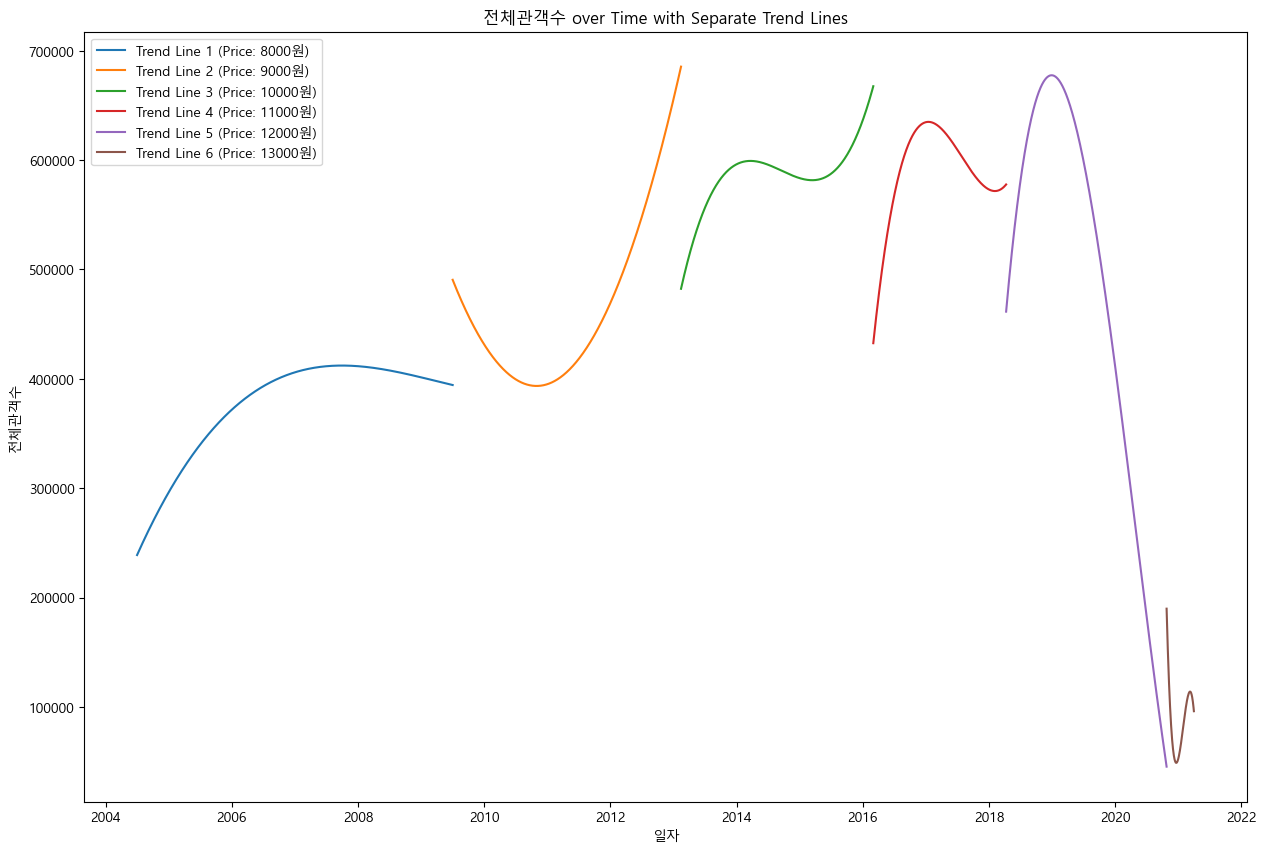

In [94]:
# Define the date ranges
date_ranges = [
    ("2004-07-01", "2009-07-02"),
    ("2009-07-02", "2013-02-13"),
    ("2013-02-13", "2016-03-02"),
    ("2016-03-02", "2018-04-10"),
    ("2018-04-10", "2020-10-25"),
    ("2020-10-25", "2021-04-01"),
    ("2021-04-01", "2022-12-31"),
]

# Define the prices for each date range
prices = [8000, 9000, 10000, 11000, 12000, 13000]

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(15, 10))

for i, (start_date, end_date) in enumerate(date_ranges[:-1]):  # Exclude the last range, as there's no price for it
    # Filter data for the current date range
    range_data = daily_info[(daily_info["일자"] >= start_date) & (daily_info["일자"] <= end_date)]

    if not range_data.empty:
        # Convert dates to ordinal representation for regression
        range_data['일자_ordinal'] = range_data['일자'].apply(lambda x: x.toordinal())

        # Perform linear regression
        coefficients = np.polyfit(range_data['일자_ordinal'], range_data['전체관객수'], deg=4)
        trend_line = np.poly1d(coefficients)

        # Plot the trend line
        ax.plot(range_data['일자'], trend_line(range_data['일자_ordinal']), label=f'Trend Line {i + 1} (Price: {prices[i]}원)', linestyle='-')

# Set axis labels
ax.set_xlabel("일자")
ax.set_ylabel("전체관객수")

# Add a title and legend to the plot
ax.set_title("전체관객수 over Time with Separate Trend Lines")
ax.legend()

plt.show()


C:\Users\acorn\AppData\Local\Temp\ipykernel_9112\1846448547.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  range_data['일자_ordinal'] = range_data['일자'].apply(lambda x: x.toordinal())
C:\Users\acorn\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3457: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
C:\Users\acorn\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3457: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
C:\Users\acorn\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3457: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
C:\Users\acorn\anaconda3\

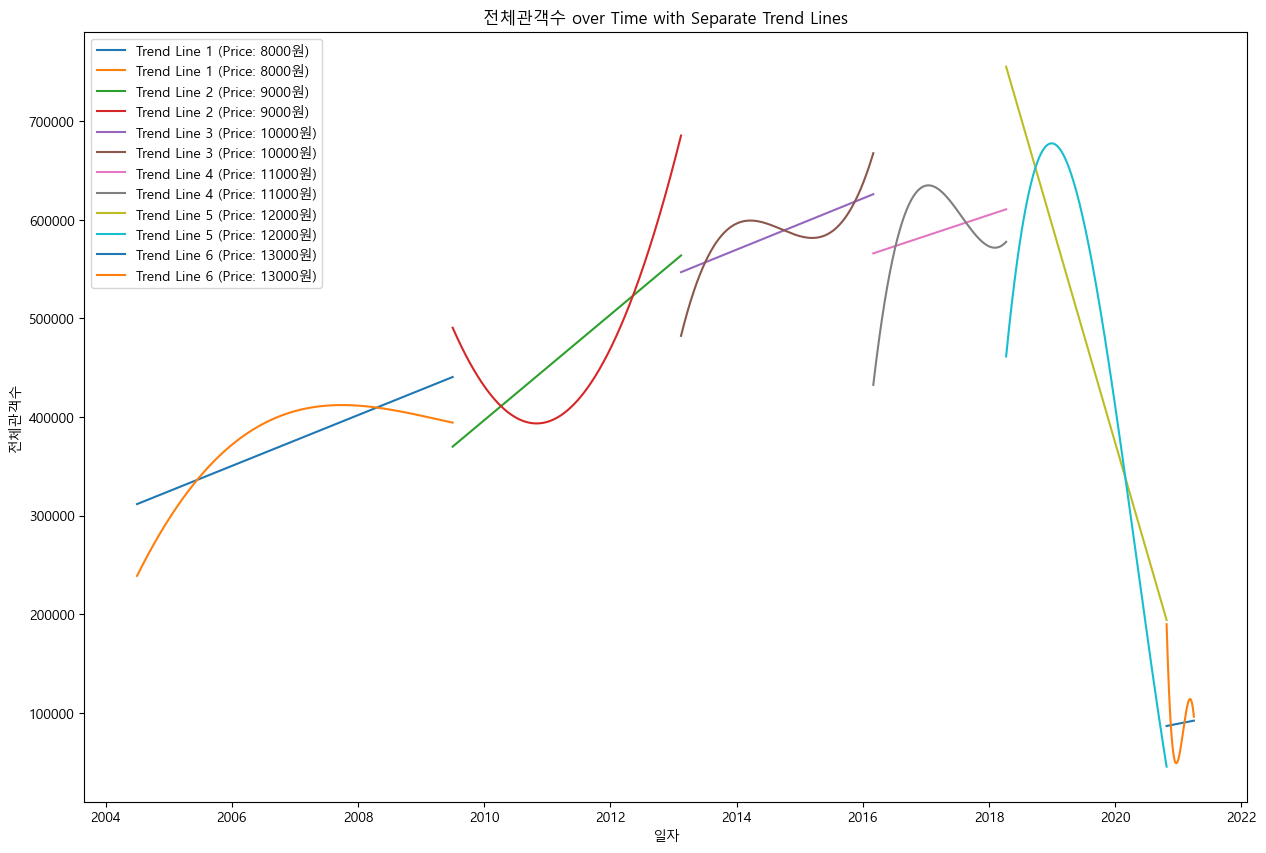

In [95]:
# Define the date ranges
date_ranges = [
    ("2004-07-01", "2009-07-02"),
    ("2009-07-02", "2013-02-13"),
    ("2013-02-13", "2016-03-02"),
    ("2016-03-02", "2018-04-10"),
    ("2018-04-10", "2020-10-25"),
    ("2020-10-25", "2021-04-01"),
    ("2021-04-01", "2022-12-31"),
]

# Define the prices for each date range
prices = [8000, 9000, 10000, 11000, 12000, 13000]

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(15, 10))

for i, (start_date, end_date) in enumerate(date_ranges[:-1]):  # Exclude the last range, as there's no price for it
    # Filter data for the current date range
    range_data = daily_info[(daily_info["일자"] >= start_date) & (daily_info["일자"] <= end_date)]

    if not range_data.empty:
        # Convert dates to ordinal representation for regression
        range_data['일자_ordinal'] = range_data['일자'].apply(lambda x: x.toordinal())

        # Perform linear regression
        coefficients1 = np.polyfit(range_data['일자_ordinal'], range_data['전체관객수'], deg=1)
        coefficients4 = np.polyfit(range_data['일자_ordinal'], range_data['전체관객수'], deg=4)
        trend_line1 = np.poly1d(coefficients1)
        trend_line4 = np.poly1d(coefficients4)

        # Plot the trend line
        ax.plot(range_data['일자'], trend_line1(range_data['일자_ordinal']), label=f'Trend Line {i + 1} (Price: {prices[i]}원)', linestyle='-')
        ax.plot(range_data['일자'], trend_line4(range_data['일자_ordinal']), label=f'Trend Line {i + 1} (Price: {prices[i]}원)', linestyle='-')

# Set axis labels
ax.set_xlabel("일자")
ax.set_ylabel("전체관객수")

# Add a title and legend to the plot
ax.set_title("전체관객수 over Time with Separate Trend Lines")
ax.legend()

In [ ]:
##